# Zillow

## Exploratory Analysis of Zillow Data

In [1]:
import numpy as np
import pandas as pd

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:.2f}'.format

# Split 
from sklearn.model_selection import train_test_split

# Scale
from sklearn.preprocessing import MinMaxScaler

# Stats
import scipy.stats as stats

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

#My Files
import env
from wrangle_zillow import *

Can leave unscaled for exploration, but scale before modeling!!


In [2]:
# aquire zillow data using function from wrangle_zillow
df = wrangle_zillow()
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,14297519,3.50,4.00,6.00,3100.00,6059.00,33634931.00,-117869207.00,4506.00,60590630.07,...,0.00,1998.00,485713.00,1023282.00,2016.00,537569.00,11013.72,0.03,2017-01-01,Orange
1,17052889,1.00,2.00,6.00,1465.00,6111.00,34449266.00,-119281531.00,12647.00,61110010.02,...,5.00,1967.00,88000.00,464000.00,2016.00,376000.00,5672.48,0.06,2017-01-01,Ventura
2,14186244,2.00,3.00,6.00,1243.00,6059.00,33886168.00,-117823170.00,8432.00,60590218.02,...,6.00,1962.00,85289.00,564778.00,2016.00,479489.00,6488.30,0.01,2017-01-01,Orange
3,12177905,3.00,4.00,8.00,2376.00,6037.00,34245180.00,-118240722.00,13038.00,60373001.00,...,0.00,1970.00,108918.00,145143.00,2016.00,36225.00,1777.51,-0.10,2017-01-01,Los Angeles
6,12095076,3.00,4.00,9.00,2962.00,6037.00,34145202.00,-118179824.00,63000.00,60374608.00,...,0.00,1950.00,276684.00,773303.00,2016.00,496619.00,9516.26,-0.00,2017-01-01,Los Angeles


In [3]:
# split data using function from
train, validate, test = split_data(df)

In [4]:
# scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [5]:
# train_scaled.head()

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

#### Notes: 

target = logerror

log_error = difference of log(Zestimate) and log(SalePrice)

Q: Why did Zillow pick the log error instead of an absolute error metric such as RMSE?

Home sale prices have a right skewed distribution and are also strongly heteroscedastic, so we need to use a relative error metric instead of an absolute metric to ensure valuation models are not biased towards expensive homes. A relative error metric like the percentage error or log ratio error avoids these problems. While we report Zestimate errors in terms of percentages on Zillow.com because we believe that to be a more intuitive metric for consumers, we do not advocate using percentage error to evaluate models in Zillow Prize, as it may lead to biased models The log error is free of this bias problem and when using the natural logarithm, errors close to 1 approximate percentage errors quite closely. See this paper for more on relative errors and why log error should be used instead of percentage error.

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2635088

#### Questions: 

1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
2. Is there a relationship between logerror and bedrooms?
3. Is there a relationship between logerror and bathrooms?
4. Is there a relationship between logerror and area?
5. Is there a relationship between logerror and longitude?
6. Is there a relationship between logerror and lattitude?

2. Answer those questions through a mix of statistical tests and visualizations.

Question 1: 

Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Orange county has a greater log error than L.A. and Ventura counties; Ventura having the lowest log error. The mean log error is 0.02. L.A. and Ventura are below the average and Orange County is above the average log error. They are all very similar however. 

In [6]:
train.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror
count,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,...,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00,29089.00
mean,12947269.09,2.28,3.30,6.16,1899.37,6049.14,34024104.39,-118193863.72,11306.04,60494472.00,...,2525.41,96629.80,1.90,1963.21,186578.14,493449.33,2016.00,306871.19,6028.58,0.02
std,1950481.77,0.98,0.93,1.37,938.98,21.05,274310.86,356191.60,88440.99,208918.38,...,803.53,4373.09,3.14,23.02,196723.79,502157.07,0.00,357883.45,5789.82,0.17
min,10711855.00,1.00,1.00,1.00,300.00,6037.00,33340620.00,-119475265.00,236.00,60371011.10,...,1286.00,95982.00,0.00,1880.00,148.00,3254.00,2016.00,161.00,49.18,-4.66
25%,11502542.00,2.00,3.00,6.00,1263.00,6037.00,33827385.00,-118399974.00,5595.00,60374008.00,...,1286.00,96208.00,0.00,1950.00,76088.00,190372.00,2016.00,74077.00,2610.70,-0.02
50%,12576262.00,2.00,3.00,6.00,1650.00,6037.00,34025724.00,-118153327.00,6795.00,60376037.02,...,3101.00,96412.00,0.00,1960.00,130000.00,369000.00,2016.00,214625.00,4594.88,0.01
75%,14129435.00,3.00,4.00,7.00,2290.00,6059.00,34189058.00,-117930191.00,8720.00,60590423.27,...,3101.00,96995.00,5.00,1979.00,223152.00,609149.00,2016.00,402000.00,7272.74,0.04
max,162960596.00,10.00,12.00,12.00,11020.00,6111.00,34818767.00,-117554636.00,6971010.00,61110091.00,...,3101.00,399675.00,14.00,2016.00,3316500.00,4993132.00,2016.00,4847224.00,59247.88,3.39


In [7]:
train.shape


(29089, 23)

In [8]:
train.logerror.describe()

count   29089.00
mean        0.02
std         0.17
min        -4.66
25%        -0.02
50%         0.01
75%         0.04
max         3.39
Name: logerror, dtype: float64

In [9]:
train.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate',
       'county'],
      dtype='object')

In [10]:
train.county.head()

61675    Los Angeles
7581     Los Angeles
48630    Los Angeles
66151        Ventura
38789         Orange
Name: county, dtype: object

In [11]:
train.logerror.head()

61675   0.01
7581    0.42
48630   0.04
66151   0.02
38789   0.01
Name: logerror, dtype: float64

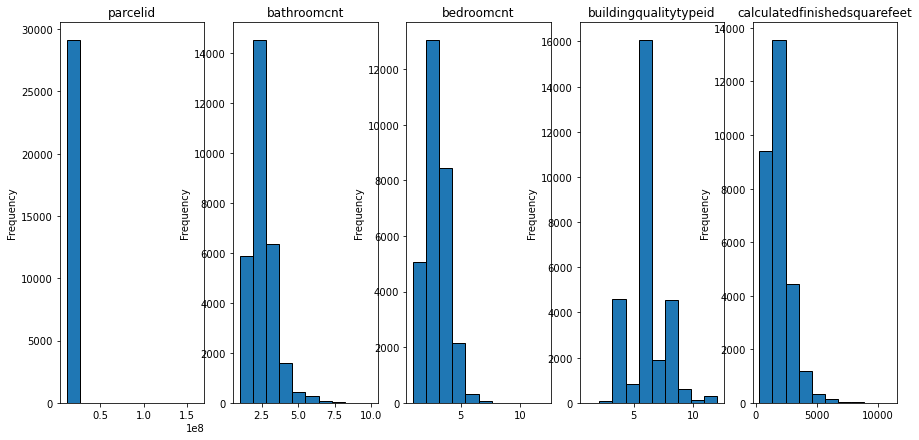

In [12]:
fig, axs = plt.subplots(1, 5, figsize=(15, 7))

for ax, col in zip(axs, train.select_dtypes('number')):
    train[col].plot.hist(ax=ax, title=col, ec='black')

<AxesSubplot:ylabel='Frequency'>

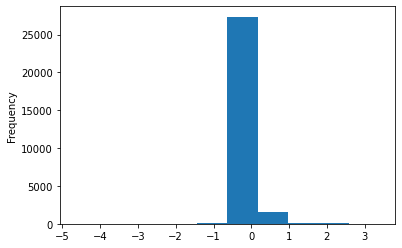

In [13]:
train.logerror.plot.hist()

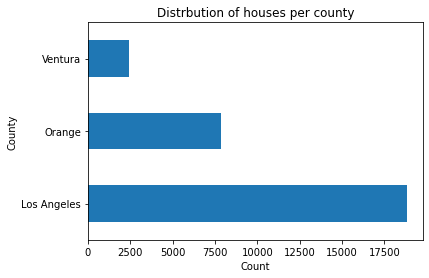

In [14]:
train.county.value_counts().plot.barh()
plt.title('Distrbution of houses per county')
plt.ylabel('County')
plt.xlabel('Count')
plt.show()

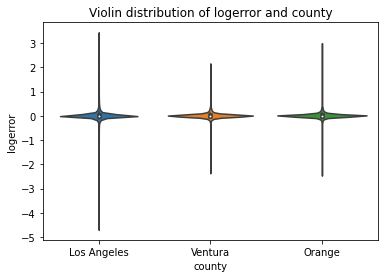

In [15]:
sns.violinplot(data=train, y='logerror', x='county')
plt.title('Violin distribution of logerror and county')
plt.show()

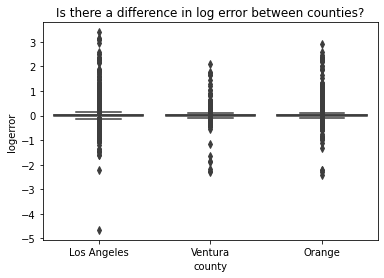

In [16]:
sns.boxplot(data=train, y='logerror', x='county')
plt.title("Is there a difference in log error between counties?")
plt.show()

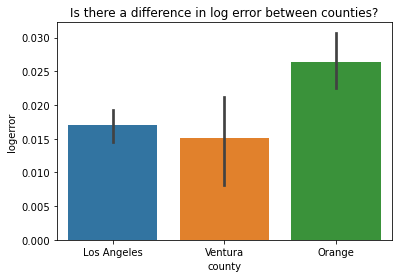

In [17]:
sns.barplot(data=train, y='logerror', x='county')
plt.title("Is there a difference in log error between counties?")
plt.show()


Text(0.5, 1.0, 'Orange County Has The Largest Proportion of Zestimate Max Error,\n Los Angeles Has The Smallest Proportion of Zestimate Minimum Error')

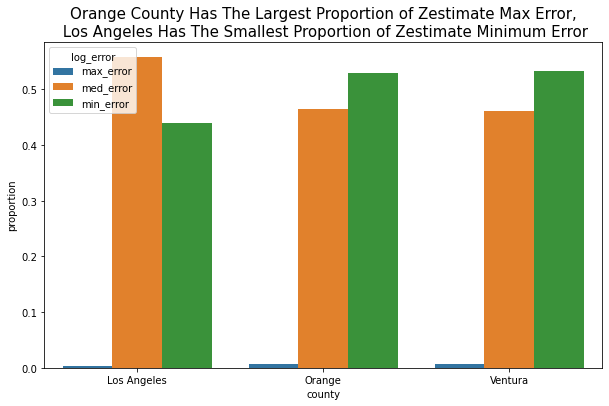

In [20]:
# add a column that bins each value of logerror into max, min, or med absolute error
train['log_error'] = pd.cut(train.logerror, bins=[-5,-1,-.03,.03,1,5], ordered=False, labels=['max_error','med_error','min_error','med_error','max_error'])

# plot the data to see if any county has a higher percentage of max logerrors
x, y, hue = 'county', 'proportion', 'log_error'
hue_order = ['max_error', 'med_error', 'min_error']

plt.figure(figsize=(10,6))
(train[hue]
 .groupby(train[x])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
plt.title('Orange County Has The Largest Proportion of Zestimate Max Error,\n Los Angeles Has The Smallest Proportion of Zestimate Minimum Error', size=15)

Text(0.5, 1.0, 'Los Angeles Zestimates\n Are Less Likely To Be Accurate')

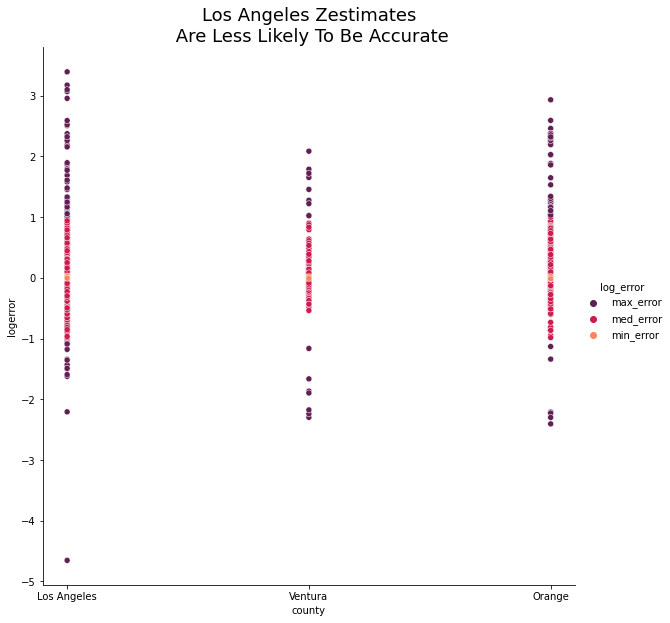

In [22]:
# plot the data to see which areas have the most logerror
sns.relplot(data=train, x='county', y='logerror', hue='log_error', hue_order=['max_error', 'med_error','min_error'], height=8, palette='rocket')
plt.title('Los Angeles Zestimates\n Are Less Likely To Be Accurate', size=18)

Stats Testing:

Levene's Test: tests whether the three means that have been taken from sample populations that have equal variance

Null Hypothesis: There is no difference in log errors variance between the three samples

Alternaive Hypothesis: There is a difference in log errors variance between the three samples

In [25]:
stats.levene(
    df[df.county == 'los_angeles'].logerror,
    df[df.county == 'orange'].logerror,
    df[df.county == 'ventura'].logerror,
)

LeveneResult(statistic=nan, pvalue=nan)

A low P value, means we can reject the null hypothesis, that there is no difference in log errors variance between the three samples.

Because Variances were not equal, I used a Kruskal test to calculate the P.

In [28]:
null_hypothesis = "Median logerrors are the same across all counties"
alternative_hypothesis = "Median logerrors are different across all counties"
alpha = 0.05 # I will be 95% certain the results I see aren't due to chance/randomness


In [29]:
stats.kruskal(
    train[train.county == 'los_angeles'].logerror,
    train[train.county == 'orange'].logerror,
    train[train.county == 'ventura'].logerror,
)

KruskalResult(statistic=nan, pvalue=nan)

In [33]:
p = 0.0000039447094787954245
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that average logerrors are different across all counties.")

We reject the null hypothesis that Median logerrors are the same across all counties
We move forward with the alternative hypothesis that Median logerrors are different across all counties


A low P value means that we can reasonably reject the null hypothesis and move foraward with the idea that Average logerrors are different across all couties.

In [35]:
# Is Orange County is higher than LA
stats.mannwhitneyu(train[train.county == 'orange'].logerror,
                   train[train.county == 'los_angeles'].logerror,
                   alternative ='greater')

MannwhitneyuResult(statistic=0.0, pvalue=1.0)

Takeaway: Orange County log errors are greater than LA's.

In [38]:
# Is Orange County is higher than Ventura
stats.mannwhitneyu(train[train.county == 'orange'].logerror,
                   train[train.county == 'ventura'].logerror,
                   alternative ='greater')

MannwhitneyuResult(statistic=0.0, pvalue=1.0)

Takeaway: Orange County's log errors are not significantly higher than Ventura's.

In [40]:
stats.kruskal(train[train.county == 'orange'].logerror,
                   train[train.county == 'ventura'].logerror,)

KruskalResult(statistic=nan, pvalue=nan)

There is nostatistically significant difference between the median logerrors of orange and ventura.

In [42]:
# Is L.A. lower than Ventura
stats.mannwhitneyu(train[train.county == 'los_angeles'].logerror,
                   train[train.county == 'ventura'].logerror,
                   alternative ='less')

MannwhitneyuResult(statistic=0.0, pvalue=1.0)

Takeaway: LA's log errors are lower than Ventura's.

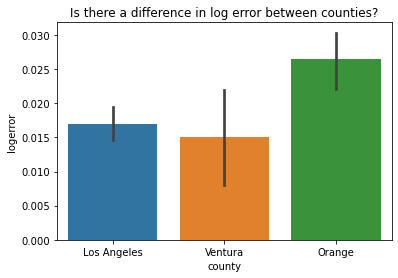

In [45]:
sns.barplot(data=train, y='logerror', x='county')
plt.title("Is there a difference in log error between counties?")
plt.show()

Question 2: 

Is there a relationship between logerror and bedrooms?

In [47]:
train.columns


Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate',
       'county', 'log_error'],
      dtype='object')

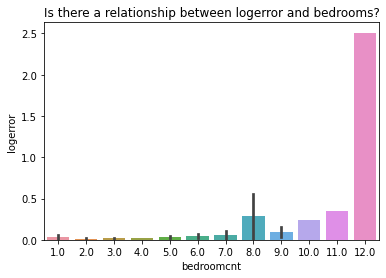

In [48]:
sns.barplot(data=train, y='logerror', x='bedroomcnt')
plt.title("Is there a relationship between logerror and bedrooms?")
plt.show()

In [49]:
null_hypothesis = "There is no correlation between bedrooms and log error ."
alternative_hypothesis = "There is a correlation between bedrooms and log error ."
alpha = 0.05 # I will be 99% certain the results I see aren't due to chance/randomness

In [50]:
x = train.bedroomcnt
y = train.logerror

In [51]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.03621225511849252, 6.494296452020137e-10)

In [61]:
p =  0.0000000006494296452020137
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that there is a correlation between latitude and log error.")

We reject the null hypothesis that There is no correlation between bathrooms and log error .
We move forward with the alternative hypothesis that There is a correlation between bathrooms and log error .


Question 3:

Is there a relationship between logerror and bathrooms?

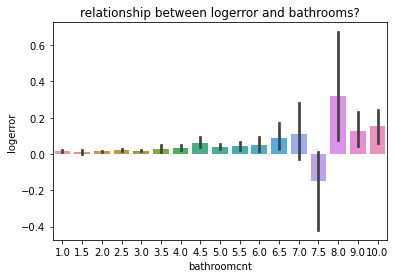

In [55]:
sns.barplot(data=train, y='logerror', x='bathroomcnt')
plt.title("relationship between logerror and bathrooms?")
plt.show()

In [56]:
null_hypothesis = "There is no correlation between bathrooms and log error ."
alternative_hypothesis = "There is a correlation between bathrooms and log error ."
alpha = 0.05 # I will be 99% certain the results I see aren't due to chance/randomness

In [57]:
x = train.bathroomcnt
y = train.logerror

In [58]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.03838571414931025, 5.792102826106448e-11)

In [60]:
p =  0.0000000005792102826106448
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that there is a correlation between latitude and log error.")

We reject the null hypothesis that There is no correlation between bathrooms and log error .
We move forward with the alternative hypothesis that There is a correlation between bathrooms and log error .


Question 4:

Is there a relationship between logerror and area?

In [66]:
train.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate',
       'county', 'log_error'],
      dtype='object')

In [63]:
null_hypothesis = "There is no correlation between area and log error."
alternative_hypothesis = "There is a correlation between area and log error ."
alpha = 0.05 # I will be 99% certain the results I see aren't due to chance/randomness

In [67]:
x = train.calculatedfinishedsquarefeet
y = train.logerror

In [69]:
corr, p = stats.pearsonr(x, y)
corr, p
 
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that there is a correlation between latitude and log error.")

We reject the null hypothesis that There is no correlation between area and log error.
We move forward with the alternative hypothesis that There is a correlation between area and log error .


Question 5:

Is there a relationship between logerror and latitude?

In [71]:
null_hypothesis = "There is no correlation between latitude and log error ."
alternative_hypothesis = "There is a correlation between latitude and log error ."
alpha = 0.05 # I will be 99% certain the results I see aren't due to chance/randomness

In [72]:
x = train.latitude
y = train.logerror

In [73]:
corr, p = stats.pearsonr(x, y)
corr, p

p = 0.04870120892543511
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that there is a correlation between latitude and log error.")

We reject the null hypothesis that There is no correlation between latitude and log error .
We move forward with the alternative hypothesis that There is a correlation between latitude and log error .


Question 6:

Is there a relationship between logerror and longitude?

In [74]:
null_hypothesis = "There is no correlation between longitude and log error ."
alternative_hypothesis = "There is a correlation between longitude and log error ."
alpha = 0.01 # I will be 99% certain the results I see aren't due to chance/randomness

In [75]:
x = train.longitude
y = train.logerror

In [76]:
corr, p = stats.pearsonr(x, y)
corr, p

p = 0.04870120892543511
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that there is a correlation between longitude and log error.")

We fail to reject the null hypothesis
Evidence does not support the claim that there is a correlation between longitude and log error.
